## Исследования сетей общественного питания

Вы собираетесь открыть небольшое кафе в Москве, в котором гостей должны обслуживать роботы. 

Партнёры просят вас подготовить исследование рынка.

Дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

Таблица rest_data:

    • id — идентификатор объекта;
    • object_name — название объекта общественного питания;
    • chain — сетевой ресторан;
    • object_type — тип объекта общественного питания;
    • address — адрес;
    • number — количество посадочных мест.

### Импорт библиотек и первичное исследование датафрейма

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import re
import plotly.graph_objs as go 

import requests
from urllib.parse import urlencode
import json

In [3]:
#Загружаем данные

try:
    df = pd.read_csv('/datasets/rest_data.csv') #ссылка на датасет в Практикуме
except:
    try:
        df = pd.read_csv('rest_data.csv') #локальная ссылка
    except:
         df = pd.read_csv('') #ссылка в облаке Яндекса
  

In [4]:
#Посмотрим информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#Взглянем на живые данные
df.sample(5)

,id,object_name,chain,object_type,address,number
14473,220978,Бар суши TAKAI,нет,кафе,"город Москва, город Зеленоград, корпус 1602А",28
1418,74579,Рецептор,да,кафе,"город Москва, Большая Никитская улица, дом 22/2",35
7198,29108,Столовая в школе 1912 ул.2 Пятилетка д.18а (ра...,нет,столовая,"город Москва, город Зеленоград, улица Вторая П...",180
944,23844,ШОКОЛАДНИЦА,да,кафе,"город Москва, Профсоюзная улица, дом 19",48
13977,208952,Бар «Хмельная долина»,нет,бар,"город Москва, Луганская улица, дом 10",15


Посмотрим на данные чуть подробнее

In [6]:
#Функция выводит информацию по колонке - название, уникальные значения, количество нулей, распределение значений
def column_describe(data, column):
    print('Column:',column)
    print()
    print('Unique elements: ',data[column].unique())
    print()
    print('Zeroes count:',data[data[column] ==0][column].count())
    display(data[data[column] != data[column].isna()][[column]].describe([.001,.1,.95]).T)
    print('-'*80)
    print()

In [7]:
#Запустим для всех колонок
for cat in df.columns:
    column_describe(df,cat)

Column: id

Unique elements:  [151635  77874  24309 ... 209186 221900 222535]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
id,15366.0,119720.066901,73036.130732,838.0,19658.73,23308.5,144974.5,215237.25,223439.0


--------------------------------------------------------------------------------

Column: object_name

Unique elements:  ['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']

Zeroes count: 0


,count,unique,top,freq
object_name,15366,10393,Столовая,267


--------------------------------------------------------------------------------

Column: chain

Unique elements:  ['нет' 'да']

Zeroes count: 0


,count,unique,top,freq
chain,15366,2,нет,12398


--------------------------------------------------------------------------------

Column: object_type

Unique elements:  ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']

Zeroes count: 0


,count,unique,top,freq
object_type,15366,9,кафе,6099


--------------------------------------------------------------------------------

Column: address

Unique elements:  ['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13']

Zeroes count: 0


,count,unique,top,freq
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95


--------------------------------------------------------------------------------

Column: number

Unique elements:  [  48   35   95   40   50  240   10   90  150  120    5   24  140   32
  270  320    7    2  160   20   30  110    6  192   65   45    4  125
  100   49   63   70   22   56   38  220   78    3   80   46   15   96
   60   47  180  250  200   25   12   14   16  420   98   75   34  216
   43   54  580  159    0   28   64   67   42  124   82   36  114    8
   71   18  158   55  196   44   76  144   41   26   68  143  198   79
    1   86  148  190  202  131   52   92  300   85  102   88   84  246
   81   94   23   37   39   99   61   11  130   74  128  106   58  260
   27   19   29   13    9  168  350   93   33  105  239  104   17   62
  230  132   87   89  170   83   21  108  210   51   53  115   66  280
  126   97  356  156  428  380  138   72  118  139  236  450  194  330
  225  500  112  109  146  306  272  290  176  175  252  122  400  542
  424 1040  660  282  145  395  

,count,mean,std,min,0.1%,10%,50%,95%,max
number,13745.0,66.569807,76.00555,1.0,1.0,10.0,44.0,229.8,1700.0


--------------------------------------------------------------------------------



Проверим наличие дубликатов

In [8]:
#Полные дубликаты строк
print(f'Количество полных дубликатов строк: {df.duplicated().sum()}')

Количество полных дубликатов строк: 0


Полностью дублирующихся строк нет, поищем дубликаты внутри колонок "object_name" и "address"

In [9]:
for col in ['object_name','address']:
    print('Column:',col)
    print('Duplicates = ',df[col].duplicated().sum())
    print('-'*20)

Column: object_name
Duplicates =  4973
--------------------
Column: address
Duplicates =  6258
--------------------


Одинаковых названий почти 5000, а одинаковых адресов больше 6000. Но это тоже пока не дубликаты. Посмотрим вариант когда одновременно совпадают название и адрес.

In [10]:
#Посчитаем количество дубликатов по двум колонкам
print(f'Дубликаты по колонкам "object_name", "address": {df.duplicated(subset=["object_name", "address"]).sum()}')

Дубликаты по колонкам "object_name", "address": 207


Уже лучше, но и это могут быть не дубликаты, а разные заведения в одном и том же здании.

In [11]:
#Посчитаем количество дубликатов по трём колонкам
print(f'Дубликаты по колонкам "object_name", "address", "object_type": \
{df.duplicated(subset=["object_name", "address", "object_type"]).sum()}')

Дубликаты по колонкам "object_name", "address", "object_type": 171


In [12]:
#Посмотрим что на живых данных
df[df.duplicated(subset=['object_name', 'address', 'object_type'])]

,id,object_name,chain,object_type,address,number
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
...,...,...,...,...,...,...
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
15216,214468,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
15217,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [13]:
#Увеличим количество совпадающих колонок в условии
print(f'Дубликаты по колонкам "object_name", "address", "object_type", "number": \
{df.duplicated(subset=["object_name", "address", "object_type", "number"]).sum()}')

Дубликаты по колонкам "object_name", "address", "object_type", "number": 82


In [14]:
#Посмотрим как выглядит выборка
df[df.duplicated(subset=['object_name', 'address', 'object_type', 'number'])]

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


In [15]:
#Возьмём для примера один ресторан
df[(df['object_name']=='Старый Баку') & (df['address'].str.contains('Кировоградская улица'))]

,id,object_name,chain,object_type,address,number
14577,222885,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120


Учитывая возможные ошибки в самом датасете, удалим дубликаты, совпадающие по названию заведения, адресу и количеству посадочных мест. Поскольку, похоже, этот набор признаков наилучшим образом отражает дублирование записей.

In [16]:
#Удаляем дубликаты значениям в трёх колонках
df = df.drop_duplicates(subset=['object_name', 'address', 'number'])

print(f"Дубликаты по колонкам 'object_name', 'address', 'number': \
{df.duplicated(subset=['object_name', 'address', 'number']).sum()}")

Дубликаты по колонкам 'object_name', 'address', 'number': 0


In [17]:
#Не забываем сбросить индексы
df = df.reset_index(drop=True)

In [18]:
#Посмотрим как выглядят дубликаты по двум колонкам теперь
df[df.duplicated(subset=['object_name', 'address'])]

,id,object_name,chain,object_type,address,number
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,Общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
...,...,...,...,...,...,...
15130,214468,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
15154,210885,KFC,да,предприятие быстрого обслуживания,"город Москва, Манежная площадь, дом 1, строение 2",41
15166,214872,Чайхона №1,да,кафе,"город Москва, Кутузовский проспект, дом 57",0
15276,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [19]:
#Выделим пример с Шоколадницами на Земляном валу
df[(df['object_name']=='Шоколадница') & (df['address'].str.contains('Земляной Вал,'))]

,id,object_name,chain,object_type,address,number
1332,21834,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 18-22, с...",48
1335,137181,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 27, стро...",50
15275,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15276,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


**Выводы**

В датасете в незначительном количестве присутствовали дубликаты - полностью одинаковые по характеристикам заведения, но с разными id. Мы удалили такие записи. Тем не менее остались заведения с одинаковыми адресами и названиями, но с разным числом посадочныъ мест. Такие заведения скорей всего не являются дубликатами, поскольку в больших торговых центрах или поблизости крупных офисов могут находиться несколько заведений одной сети, у которых будет один и тот же адрес.

### Виды заведений общественного питания с точки зрения их количества.

In [20]:
#Посчитаем количество заведений общепита относительно их вида
obj_vc = df['object_type'].value_counts().to_frame()

#Посмотрим что вышло
obj_vc.style.background_gradient('coolwarm')

,object_type
кафе,6068
столовая,2584
ресторан,2281
предприятие быстрого обслуживания,1898
бар,855
буфет,577
кафетерий,395
закусочная,348
магазин (отдел кулинарии),273


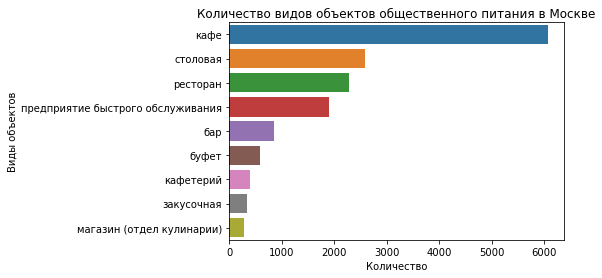

In [21]:
#Построим диаграмму
sea.barplot(y=obj_vc.index, x='object_type', data=obj_vc)\
.set(title="Количество видов объектов общественного питания в Москве", \
     xlabel='Количество', ylabel='Виды объектов');

**Выводы**

Самый распространённый тип заведений общепита в Москве - кафе, 6068 точек. Затем по популярности идут столовые - 2584 заведения, далее рестораны с 2281 заведений. На почётном 4-м месте - предприятия быстрого обслуживания - 1898 точек. Далее цифры стремительно падают от 855 баров до 273 отделов кулинарии в магазинах.

### Сравнение количества сетевых и не сетевых заведений общепита

In [22]:
#Посчитаем количество сетевых и не сетевых заведений
chain_va = df['chain'].value_counts().to_frame()

#Поменяем название колонок и индексов
chain_va = chain_va.rename(index={'нет': 'Не сетевой', 'да': 'Сетевой'},columns={'chain': "Количество"})

#Посмотрим что вышло
chain_va.style.background_gradient('coolwarm')

,Количество
Не сетевой,12315
Сетевой,2964


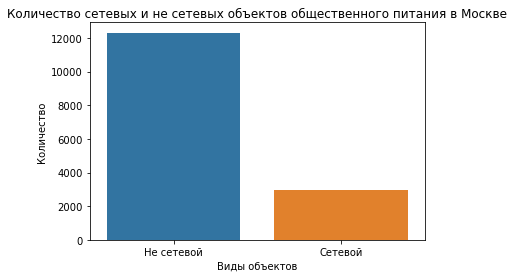

In [23]:
#Посмотрим как это выглядит на графике
sea.barplot(x=chain_va.index, y='Количество', data=chain_va)\
.set(title="Количество сетевых и не сетевых объектов общественного питания в Москве", \
     ylabel='Количество', xlabel='Виды объектов');

**Выводы**

Согласно датасету не сетвых заведений общепита в Москве насчитывается 12315, что в три раза больше, чем сетевых.

### Для какого вида объекта общественного питания характерно сетевое распространение

In [24]:
#Функция добавляющая две колонки с количеством заведений определённого типа с признаком сетевое или не сетевое
def chain_count(x):
    result = {
        'Сетевое':  x.query('chain == "да"')['chain'].count(),
        'Не сетевое': x.query('chain == "нет"')['chain'].count(),
         }
    return pd.Series(result)

In [25]:
#Применим функцию к датасету
ot_chain = df.groupby(['object_type']).apply(chain_count).sort_values(by='Сетевое')

#Посмотрим что вышло
ot_chain.style.background_gradient('coolwarm')

,Сетевое,Не сетевое
object_type,,
столовая,3,2581
буфет,11,566
бар,37,818
кафетерий,52,343
закусочная,56,292
магазин (отдел кулинарии),78,195
ресторан,543,1738
предприятие быстрого обслуживания,788,1110
кафе,1396,4672


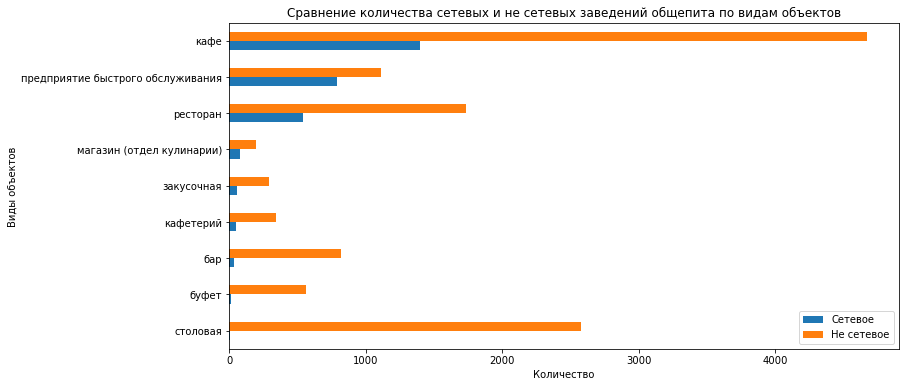

In [26]:
#Строим столбчатую диаграмму
oc = ot_chain.plot.barh(figsize=(12,6))
oc.set_title("Сравнение количества сетевых и не сетевых заведений общепита по видам объектов")
oc.set_xlabel('Количество')
oc.set_ylabel('Виды объектов')
plt.show()

In [27]:
#Функция добавляющая две колонки с процентным отношением заведений определённого типа
def chain_percent(x):
    result = {
        'Сетевое':  x.query('chain == "да"')['chain'].count() / (x.query('chain == "да"')['chain'].count() + \
                                                                  x.query('chain == "нет"')['chain'].count())*100,
        'Не сетевое': x.query('chain == "нет"')['chain'].count() / (x.query('chain == "да"')['chain'].count() + \
                                                                  x.query('chain == "нет"')['chain'].count())*100,
                     }
    return pd.Series(result)

In [28]:
#Применим функцию к датасету
ot_perc = df.groupby(['object_type']).apply(chain_percent).sort_values(by='Не сетевое', ascending=False)

#Посмотрим что вышло
ot_perc.style.background_gradient('coolwarm')

,Сетевое,Не сетевое
object_type,,
столовая,0.116099,99.883901
буфет,1.906412,98.093588
бар,4.327485,95.672515
кафетерий,13.164557,86.835443
закусочная,16.091954,83.908046
кафе,23.005933,76.994067
ресторан,23.805349,76.194651
магазин (отдел кулинарии),28.571429,71.428571
предприятие быстрого обслуживания,41.517387,58.482613


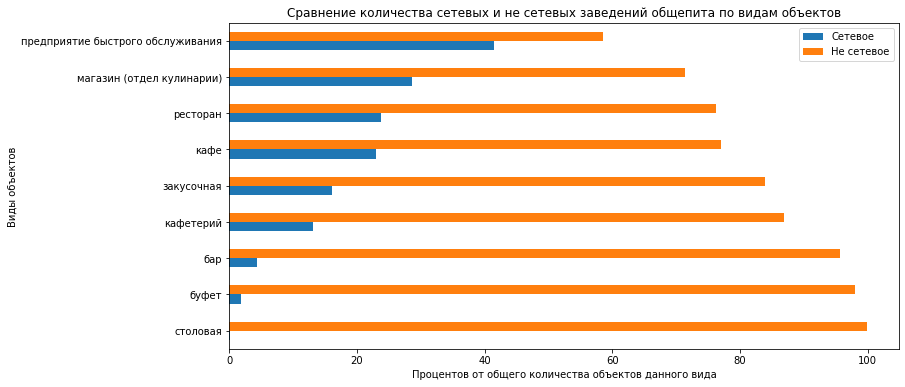

In [29]:
#Строим столбчатую диаграмму
ot_p = ot_perc.plot.barh(figsize=(12,6))
ot_p.set_title("Сравнение количества сетевых и не сетевых заведений общепита по видам объектов")
ot_p.set_xlabel('Процентов от общего количества объектов данного вида')
ot_p.set_ylabel('Виды объектов')
plt.show()

**Вывод**

Учитывая предыдущие подсчёты, очевидно, что больше всего в Москве насчитывается не сетевых кафе. 4762 не сетевых  против 1396 сетевых. На втором месте по количеству не сетвых заведений идут столовые - 2581, а вот сетевых столовых аномально мало - всего 3 штуки на всю Москву. Далее тренд чуть-чуть меняется для ресторанов и предприятий быстрого обслуживания. Доля сетевых заведений для этих типов общепита заметно возрастает, 1738 не сетевых против 543 сетевых для ресторанов и 1110 не сетевых против 788 сетевых предприятий быстрого обслуживания. Однако для других видов общепита по списку соотношение значительно падает не в пользу сетевых заведений. 

Действительно неверно сформулированно, лучше так:
В целом можно сказать, что при численном доминировании не сетевых заведений, процент сетевых заметно возрастает среди предприятий быстрого обслуживания, отделов кулинарии, ресторанов и кафе. Остальные виды общепита мало предрасположены к сетевому распространению.

### Ранжирование  сетевых заведений по количеству объектов и числу посадочных мест

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Сгруппируем по названию все сетевые заведения, посчитаем их общее количество и среднее количесвто посадочных мест для каждой сети. 

In [30]:
#Функция вычиcляющая количество заведений сети и среднее количество мест в её заведениях
def number_count(x):
    result = {
        'object_count':  x['object_name'].count(),
        'seats_mean': x['number'].mean(),
    }
    return pd.Series(result)

In [31]:
#Соберём таблицу для графика
on_chain = df.query('chain == "да"').groupby(['object_name']).apply(number_count)\
            .sort_values(by='object_count', ascending=False).reset_index()
#Переименуем колонки
#on_chain =on_chain.rename(columns={'object_name': 'Название','object_count': "Количество заведений", \
#                                   'seats_mean': "Среднее количество мест"})
#Посмотрим что вышло
display(on_chain.head(20).style.background_gradient('coolwarm'))

,object_name,object_count,seats_mean
0,KFC,155.000000,55.341935
1,Шоколадница,141.000000,56.170213
2,Бургер Кинг,122.000000,45.016393
3,Макдоналдс,121.000000,82.173554
4,Домино'с Пицца,86.000000,18.209302
5,Теремок,84.000000,25.047619
6,Крошка Картошка,82.000000,22.963415
7,Милти,65.000000,1.430769
8,Суши Wok,61.000000,7.131148
9,Папа Джонс,50.000000,22.160000


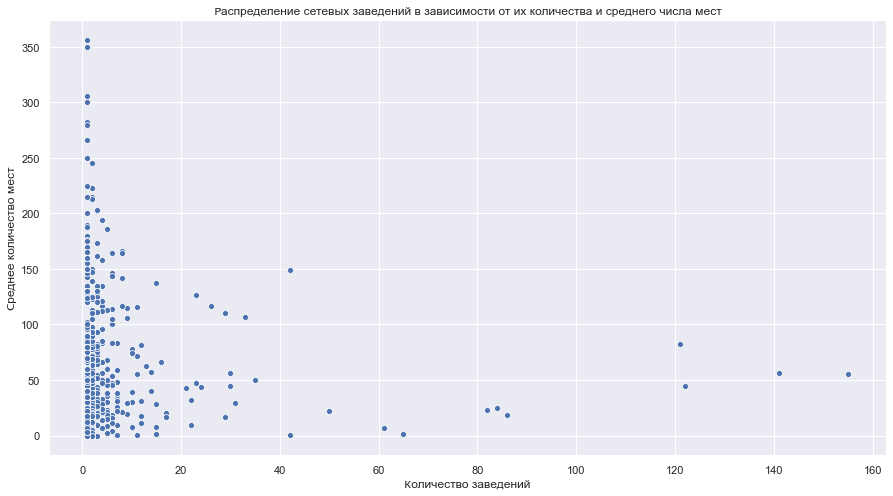

In [103]:
#Строим график распределения сетевых заведений в зависимости от их количества и числа мест
sea.set(rc={'figure.figsize':(15, 8)})
on_graph = sea.scatterplot(data=on_chain, x='object_count', y='seats_mean')
on_graph.set_title("Распределение сетевых заведений в зависимости от их количества и среднего числа мест")
on_graph.set_xlabel('Количество заведений')
on_graph.set_ylabel('Среднее количество мест');

**Вывод**

Судя по данным, в Москве среди сетевых заведений общественного питания превалирует модель с небольшим количеством  заведений, ёмкость которых находится в пределах 100 мест.

### Ранжирование видов заведений общепита по вместительности

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [33]:
#Группируем датасет по типу заведений и считаем среднее количество мест
obj_t_mean = df.groupby('object_type')[['number']].mean().sort_values(by='number')

#Смотрим что вышло
obj_t_mean.style.background_gradient('coolwarm')

,number
object_type,
магазин (отдел кулинарии),5.589744
закусочная,7.801724
кафетерий,9.184810
предприятие быстрого обслуживания,20.808219
кафе,39.793507
бар,43.533333
буфет,51.509532
ресторан,96.925033
столовая,130.337848


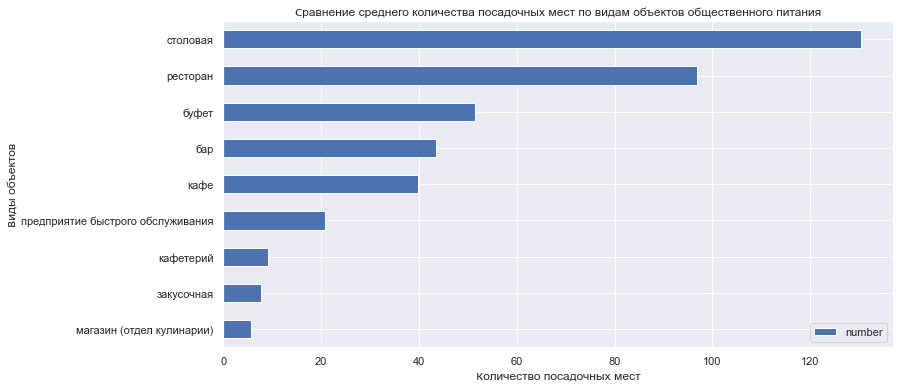

In [104]:
#Строим столбчатую диаграмму
om = obj_t_mean.plot.barh(figsize=(12,6))
om.set_title("Сравнение среднего количества посадочных мест по видам объектов общественного питания")
om.set_xlabel('Количество посадочных мест')
om.set_ylabel('Виды объектов')
plt.show()

**Вывод**

В среднем самое большое количество посадочных мест предоставляют столовые.

### Выделите в отдельный столбец информацию об улице из столбца address .

In [35]:
#Посмотрим как в принципе выглядят адреса
df.sample(5)

,id,object_name,chain,object_type,address,number
2549,28173,СТОЛОВАЯ,нет,столовая,"город Москва, Старокалужское шоссе, дом 58",35
5572,143462,Чайхона №1,да,ресторан,"город Москва, Городецкая улица, дом 5",125
5075,28897,СТОЛОВАЯ ПРИ ГОУ СОШ № 1043,нет,столовая,"город Москва, Люблинская улица, дом 173",266
13261,197224,Братья Караваевы,да,кафе,"город Москва, Шмитовский проезд, дом 10/7",25
1316,26123,Корчма Тарас Бульба,да,ресторан,"город Москва, улица Черняховского, дом 3",120


In [36]:
#Посмотрим есть ли в датасете адреса другого формата, чем "город, поселение, деревня / улица, дом"
df[df['address'].str.contains('Москва') == False]

,id,object_name,chain,object_type,address,number
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100
1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40
7663,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198
7799,28214,Роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80
...,...,...,...,...,...,...
13120,192918,Limassol,нет,кафе,"Бауманская улица, дом 7, строение 3",42
13333,204788,Крошка Картошка,да,предприятие быстрого обслуживания,"Солянский тупик, дом 1/4, строение 1",15
13922,204917,Шаурма на углях- Чайхана Баракат,нет,кафе,"Таганская площадь, дом 88, строение 4",80
13934,211986,FRESH CAFE,нет,кафе,"Шарикоподшипниковская улица, дом 5, строение 1",42


Таких "неформатных" адресов немного, но они есть, давайте приведём их к единому виду.

In [37]:
#Напишем фукнцию, которая добавит в адреса "город Москва" там, где его нет
def split_add(col):
    #Проверяем с помощью регулярного выражения вхождение последовательности "город Москва" в проверяемую строку
    if re.match('.*город Москва*',col):
        #Если входит, возвращаем как есть
        return col[:]
    #Если не входит, складываем последовательно строки и после возвращаем
    return 'город Москва' + ',' + col[:]

In [38]:
#Проверка
split_add(' поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А')

'город Москва, поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А'

In [39]:
df['address'] = df['address'].apply(split_add)

In [40]:
#Default city наконец обрёл имя в каждой ячейке адреса
df[df['address'].str.contains('Москва') == False]

,id,object_name,chain,object_type,address,number


In [41]:
#Напишем фукнцию, которая вытащит улицу в соответствии с разделителями из ячейки с адресом
def split_col(col):
    spl = col.split(",")
    if re.match('.*поселение.*',col) or re.match('.*Зеленоград.*',col):
        return spl[2].lstrip()
    return spl[1].lstrip()

In [42]:
#Проверка работы функции
split_col('город Москва, поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А')

'деревня Сенькино-Секерино'

In [43]:
#Применим функцию, создав столбик с названием улицы, либо деревни в которй находится дом
df['street'] = df['address'].apply(split_col)

In [44]:
#Готово
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Постройте график топ-10 улиц по количеству объектов общественного питания.

Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [45]:
#Сгруппируем улицы и посчитаем количество заведений на каждой из них, возьмём первые 10
street_top_10 = df.groupby('street')[['id']].count().sort_values(by='id', ascending=False).head(10)
street_top_10.style.background_gradient('coolwarm')

,id
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,172
Пресненская набережная,167
Варшавское шоссе,163
Ленинский проспект,148
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


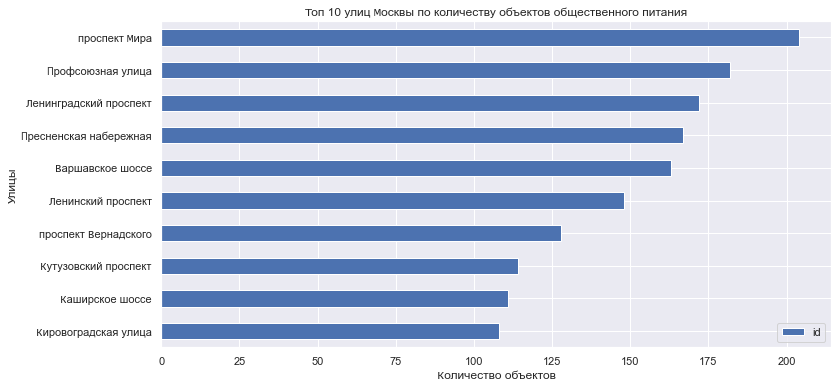

In [105]:
#Строим столбчатую диаграмму
st_10 = street_top_10.sort_values(by='id').plot.barh(figsize=(12,6))
st_10.set_title('Топ 10 улиц Москвы по количеству объектов общественного питания')
st_10.set_xlabel('Количество объектов')
st_10.set_ylabel('Улицы')
plt.show()

Теперь, если мы хотим нарисовать интерактивную карту заведений, расположенных в топ 10 улиц Москвы по количеству заведений общепита, нам понадобится собрать адреса всех заведений на этих улицах. 

In [47]:
#Функция собирающая адреса заведений расположенных в списке топ 10 улиц Москвы по количеству объектов общепита
def addr_str(row):
    addr = row['address']
    street = row['street']
    idx = row['id']
    for i in street_top_10.index:
        if street == i:
            return (addr).lstrip()

In [48]:
#Применим функцию
map_addr = df.apply(addr_str, axis=1).to_frame().dropna().reset_index()
map_addr.head()

,index,0
0,151,"город Москва, Варшавское шоссе, дом 2"
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1"
2,153,"город Москва, Варшавское шоссе, дом 29"
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2"
4,155,"город Москва, Варшавское шоссе, дом 100"


In [49]:
#Заменим название колонки 0
map_addr = map_addr.rename(columns={0: 'address'})
map_addr.head()

,index,address
0,151,"город Москва, Варшавское шоссе, дом 2"
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1"
2,153,"город Москва, Варшавское шоссе, дом 29"
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2"
4,155,"город Москва, Варшавское шоссе, дом 100"


In [50]:
#Для определения координат зданий оставим только уникальные адреса
map_addr_un = map_addr.drop_duplicates(subset=['address']).reset_index(drop=True)
map_addr_un.head()

,index,address
0,151,"город Москва, Варшавское шоссе, дом 2"
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1"
2,153,"город Москва, Варшавское шоссе, дом 29"
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2"
4,155,"город Москва, Варшавское шоссе, дом 100"


Используем Геокодер

In [51]:
#запишем полученный ключ для геокодера
key = '*'
#зададим параметры запроса, чтобы получать в ответ на запрос json - файл
params = { # словарь с параметрами запроса
        "format" : "json", # определяем формат ответа на запрос
    }

In [52]:
#зададим функцию, которая на вход будет получать адрес и возвращать район
def mapmaker(address):
    
    #создадим url для запроса координат
    url = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + address
    
    #сделаем запрос к геокодеру
    response = requests.get(url, params = params)

    #получим координаты точки
    try:
        coord = json.loads(response.text)['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
    except:
        coord = 'Не определен'
        
    #создадим url для запроса по координатам
    url_coord = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + coord
    
    #делаем запрос по координатам
    response_coord = requests.get(url_coord, params = params)
    
    #получаем район из результатов запроса
    try:
        district = json.loads(response_coord.text)['response']['GeoObjectCollection']['featureMember'][2]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['Locality']['DependentLocality']['DependentLocality']['DependentLocalityName']
    except:
        district = 'Не определен'

    return(coord, district)

In [53]:
#Пример работы функции mapmaker
#mapmaker('город Москва, Стромынский переулок, дом 4')

Поскольку бесплатный геокодер яндекса имеет существенные ограничения на количество запросов, то во время работы и тестирования пришлось завести несколько API и применять запросы, разделив и без того маленький датасет ещё на части. Но в результате многодневных мучений и отлова ошибок, всё получилось и был получен файл, содержащий координаты и районы в которых находятся запрашиваемые адреса.

In [54]:
#После отрабатывания функции записываем адреса и координаты в файл
map_addr_un.to_csv('map_addr_un2.csv', encoding='utf-8', index=False)

Закинем файл на яндекс диск, из которого его, достанем с помощью скрипта.

In [55]:
#Используем функцию извлекающую файл по ссылке Яндекс диска
def file_disc(key,file_name):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = key #Ссылка на скачивание из папки диска 

    file_url = file_name #имя файла

    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url) #запрос ссылки на скачивание
    h = response.json()['href'] #'парсинг' ссылки на скачивание
    return h

In [56]:
#Скачиваем файл
address_data = pd.read_csv(file_disc('https://disk.yandex.ru/d/Uf0JG7Ka2hvhaw', 'map_addr_un_test.csv'), sep=',')

In [57]:
#Взглянем на результаты труда
display(address_data.head())

,address,coord,district
0,"город Москва, Варшавское шоссе, дом 2",37.619683 55.699949,Донской район
1,"город Москва, Варшавское шоссе, дом 7, корпус 1",37.622405 55.700877,Донской район
2,"город Москва, Варшавское шоссе, дом 29",37.622801 55.693079,Донской район
3,"город Москва, Варшавское шоссе, дом 72, корпус 2",37.618767 55.656839,Не определен
4,"город Москва, Варшавское шоссе, дом 100",37.618821 55.646233,Не определен


In [58]:
#Разделим координаты на две колонки - широта и долгота
coord_geo = address_data['coord'].str.split(' ',expand=True)
coord_geo.columns=['geo_lon','geo_lat']
coord_geo.head()

,geo_lon,geo_lat
0,37.619683,55.699949
1,37.622405,55.700877
2,37.622801,55.693079
3,37.618767,55.656839
4,37.618821,55.646233


In [59]:
#Соберём таблицу в нужном виде
address_geo = pd.concat([address_data[['address','district']], coord_geo], axis=1)
address_geo.head()

,address,district,geo_lon,geo_lat
0,"город Москва, Варшавское шоссе, дом 2",Донской район,37.619683,55.699949
1,"город Москва, Варшавское шоссе, дом 7, корпус 1",Донской район,37.622405,55.700877
2,"город Москва, Варшавское шоссе, дом 29",Донской район,37.622801,55.693079
3,"город Москва, Варшавское шоссе, дом 72, корпус 2",Не определен,37.618767,55.656839
4,"город Москва, Варшавское шоссе, дом 100",Не определен,37.618821,55.646233


Далее нам надо сделать из большой таблицы с заведениями и маленькой таблицы с уникальными адресами заведений одну  

In [60]:
#Применяем метод merge для слияния таблиц address_geo и map_addr
map_data = map_addr.merge(address_geo,how='left', on='address')
map_data.head()

,index,address,district,geo_lon,geo_lat
0,151,"город Москва, Варшавское шоссе, дом 2",Донской район,37.619683,55.699949
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1",Донской район,37.622405,55.700877
2,153,"город Москва, Варшавское шоссе, дом 29",Донской район,37.622801,55.693079
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2",Не определен,37.618767,55.656839
4,155,"город Москва, Варшавское шоссе, дом 100",Не определен,37.618821,55.646233


Теперь можем добавить в финальную таблицу тип заведения и количество мест, чтобы потом отображать всё на карте

In [61]:
#Применяем метод merge для слияния таблиц map_data и df
map_data_final = map_data.merge(df[['object_type', 'number']].reset_index(),how='left', on='index')
map_data_final.head()

,index,address,district,geo_lon,geo_lat,object_type,number
0,151,"город Москва, Варшавское шоссе, дом 2",Донской район,37.619683,55.699949,кафе,150
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1",Донской район,37.622405,55.700877,кафе,36
2,153,"город Москва, Варшавское шоссе, дом 29",Донской район,37.622801,55.693079,кафе,30
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2",Не определен,37.618767,55.656839,предприятие быстрого обслуживания,0
4,155,"город Москва, Варшавское шоссе, дом 100",Не определен,37.618821,55.646233,кафетерий,2


In [62]:
#Переведём колонки с координатами в численный тип со сбросом нечисловых значений в NaN
map_data_final['geo_lon'] = pd.to_numeric(map_data_final['geo_lon'], errors='coerce')
map_data_final['geo_lat'] = pd.to_numeric(map_data_final['geo_lat'], errors='coerce')
map_data_final.head()

,index,address,district,geo_lon,geo_lat,object_type,number
0,151,"город Москва, Варшавское шоссе, дом 2",Донской район,37.619683,55.699949,кафе,150
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1",Донской район,37.622405,55.700877,кафе,36
2,153,"город Москва, Варшавское шоссе, дом 29",Донской район,37.622801,55.693079,кафе,30
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2",Не определен,37.618767,55.656839,предприятие быстрого обслуживания,0
4,155,"город Москва, Варшавское шоссе, дом 100",Не определен,37.618821,55.646233,кафетерий,2


Проведём категоризацию типа заведений по цвету

In [63]:
map_data_final['object_type'].unique()

array(['кафе', 'предприятие быстрого обслуживания', 'кафетерий',
       'магазин (отдел кулинарии)', 'столовая', 'буфет', 'ресторан',
       'бар', 'закусочная'], dtype=object)

In [64]:
#Создадим словарь соответствия типу заведений целому числу
index_obj = { k:i+1 for i,k in enumerate(sorted(set(map_data_final['object_type']))) }
index_obj

{'бар': 1,
 'буфет': 2,
 'закусочная': 3,
 'кафе': 4,
 'кафетерий': 5,
 'магазин (отдел кулинарии)': 6,
 'предприятие быстрого обслуживания': 7,
 'ресторан': 8,
 'столовая': 9}

In [65]:
#Применим словарь к колонке с типами заведений с помощью функции map 
map_data_final['obj_num'] = map_data_final['object_type'].map(index_obj).reset_index(drop=True)
map_data_final.head()

,index,address,district,geo_lon,geo_lat,object_type,number,obj_num
0,151,"город Москва, Варшавское шоссе, дом 2",Донской район,37.619683,55.699949,кафе,150,4
1,152,"город Москва, Варшавское шоссе, дом 7, корпус 1",Донской район,37.622405,55.700877,кафе,36,4
2,153,"город Москва, Варшавское шоссе, дом 29",Донской район,37.622801,55.693079,кафе,30,4
3,154,"город Москва, Варшавское шоссе, дом 72, корпус 2",Не определен,37.618767,55.656839,предприятие быстрого обслуживания,0,7
4,155,"город Москва, Варшавское шоссе, дом 100",Не определен,37.618821,55.646233,кафетерий,2,5


Рисуем карту

In [106]:
#Задаём координаты для распределения точек на карте
fig = go.Figure(go.Scattermapbox(lat=map_data_final['geo_lat'], lon=map_data_final['geo_lon'], \
                                 text=map_data_final['address'], 
                                 marker=dict(color=map_data_final['obj_num'])))
fig = go.Figure()

#Создадим интерактивную легенду 
for group in map_data_final['object_type'].unique():

    obj_group = map_data_final[map_data_final['object_type'] == group]

    fig.add_trace(
        go.Scattermapbox(
            lat=obj_group['geo_lat'], lon=obj_group['geo_lon'], text=obj_group['address'], name=group
        )
    )

#Определяем центр карты
map_center = {'lat': map_data_final['geo_lat'].values[0], 'lon': map_data_final['geo_lon'].values[0]}

#Рисуем карту
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=9),\
                  title = 'Топ 10 улиц Москвы по количеству объектов общественного питания')

#Рисуем легенду
fig.update_traces(showlegend=True)

fig.show()

Посмотрим каким районам Москвы принадлежат улицы, входящие в топ 10 по количеству заведений общественного питания.

In [67]:
#Сгруппируем районы и посмотрим количество и посмотрим количество зданий с заведениями общепита в каждом из них
dist_count = map_data_final.groupby('district')[['address']].count().sort_values(by='address', ascending=False)
dist_count.style.background_gradient('coolwarm')

,address
district,
Пресненский район,167
район Чертаново Центральное,90
район Тропарёво-Никулино,83
Мещанский район,63
район Свиблово,62
район Дорогомилово,61
Обручевский район,59
район Аэропорт,57
район Нагатино-Садовники,56


**Выводы**

Самыми популярными улицами по количеству заведений общепита являются  - проспект Мира с 204 заведениями, Профсоюзная улица - 182 заведения, Ленинградский проспект - 172 заведения, и по убыванию Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе. Замыкает топ 10 Кировоградская улица на которой находятся 108 заведений общепита.

При этом из датасета топ 10 геокодером не удалось определить районы для 50 адресов. Однако в общем количестве в 1500 адресов, этими пропусками можно пренебречь.

Если рассматривать самые насыщенные заведениями общепита районы, то безусловным лидером является Пресненский район, где находится 167 зданий в которых можно поесть, на втором месте со значительным оставанием находится район Чертаново Центральное насчитывающий 90 зданий и район Тропарёво-Никулино - 83 здания. Замыкают длинный список такие районы как Орехово-Борисово Южное - 6 адресов, в Южном Бутово вас покормят всего по двум адресам. И если вы хотите поесть в Ярославском районе, то ваш выбор невелик - один единственный адрес, куда можно обратиться, если вы проголодались во время длительной прогулки по парку.

### Найдите число улиц с одним объектом общественного питания.

Найдём улицы с одним объектом общественного питания

In [68]:
#Сгруппируем улицы и найдём такие на которых всего по одному заведению общепита
street_one = df.groupby('street')[['id']].count().sort_values(by='id').query('id == 1').reset_index()

#На всякий случай обрезаем пробелы в улицах 
street_one['street'] = street_one['street'].apply(lambda x: x.lstrip())
street_one.head()

,street,id
0,улица Знаменские Садки,1
1,Малый Полуярославский переулок,1
2,Чуксин тупик,1
3,Гаражная улица,1
4,Гвардейская улица,1


In [69]:
#Присоединим к датасету таблицу street_one и получим полную информацию о таких "одиноких" заведениях
map_addr_one = street_one[['street']].merge(df, how='left', on='street').sort_values(by='address')\
.reset_index(drop=True)

#На всякий случай ещё раз обрезаем пробелы в улицах 
map_addr_one['street'] = map_addr_one['street'].apply(lambda x: x.lstrip())
map_addr_one.head()

,street,id,object_name,chain,object_type,address,number
0,1-й Балтийский переулок,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60
1,1-й Басманный переулок,152133,Столовая института мировых цивилизаций,нет,столовая,"город Москва, 1-й Басманный переулок, дом 3, с...",50
2,1-й Ботанический проезд,21527,Буфет при ГУП «Объединенный комбинат школьно п...,нет,столовая,"город Москва, 1-й Ботанический проезд, дом 2",40
3,1-й Вешняковский проезд,28085,Столовая ГНУ ВИЭСХ,нет,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, ...",20
4,1-й Голутвинский переулок,146400,Шелби,нет,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22


###  Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Снова мучения с бесплатным геокодером

In [70]:
#Обращение к Геокодеру для определения координат и районов домов
#mapmaker('деревня Внуково')
#map_addr_one['info'] = map_addr_one[0:350]['address'].apply(mapmaker)

Получаем файлик и сразу сохраняем на яндекс диск, чтоб не забыть

In [71]:
#После отрабатывания функции записываем адреса и координаты в файл
#map_addr_one.to_csv('map_addr_one2.csv', encoding='utf-8', index=False)

In [72]:
#Скачиваем файл
address_one_data = pd.read_csv(file_disc('https://disk.yandex.ru/d/HzSPODli0sRoog', 'map_addr_one_test.csv'), \
                               sep=',')
#Снова по привычке режем пробелы
address_one_data['street'] = address_one_data['street'].apply(lambda x: x.lstrip())
address_one_data.head()

,street,id,object_name,chain,object_type,address,number,info
0,1-й Балтийский переулок,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,"37.518785 55.810471, район Аэропорт"
1,1-й Басманный переулок,152133,Столовая института мировых цивилизаций,нет,столовая,"город Москва, 1-й Басманный переулок, дом 3, с...",50,"37.662838 55.770785, Красносельский район"
2,1-й Ботанический проезд,21527,Буфет при ГУП «Объединенный комбинат школьно п...,нет,столовая,"город Москва, 1-й Ботанический проезд, дом 2",40,"37.635988 55.850707, район Свиблово"
3,1-й Вешняковский проезд,28085,Столовая ГНУ ВИЭСХ,нет,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, ...",20,"37.787929 55.724317, Рязанский район"
4,1-й Голутвинский переулок,146400,Шелби,нет,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22,"37.613503 55.739605, район Якиманка"


In [73]:
#Разрезаем координаты и районы
info2 = address_one_data['info'].str.split(',',expand=True)

#Меняем названия колонок
info2.columns=['coord','district']

#Опять режем пробелы, которые могли остаться от split
info2['district'] = info2['district'].apply(lambda x: x.lstrip())
info2.head()

,coord,district
0,37.518785 55.810471,район Аэропорт
1,37.662838 55.770785,Красносельский район
2,37.635988 55.850707,район Свиблово
3,37.787929 55.724317,Рязанский район
4,37.613503 55.739605,район Якиманка


In [74]:
#Cнова нарезаем таблички на тонкие полоски
coord_geo2 = info2['coord'].str.split(' ',expand=True)

#Называем колонки
coord_geo2.columns=['geo_lon','geo_lat']

#Переведём колонки с координатами в численный тип со сбросом нечисловых значений в NaN
coord_geo2['geo_lon'] = pd.to_numeric(coord_geo2['geo_lon'], errors='coerce')
coord_geo2['geo_lat'] = pd.to_numeric(coord_geo2['geo_lat'], errors='coerce')

coord_geo2.head()

,geo_lon,geo_lat
0,37.518785,55.810471
1,37.662838,55.770785
2,37.635988,55.850707
3,37.787929,55.724317
4,37.613503,55.739605


In [75]:
#Собираем табличку для красивой карты
map_data_one = pd.concat([map_addr_one[['street','id','object_type','address','number']], \
                          coord_geo2, info2['district']], axis=1, join="inner", \
          ignore_index=False, \
          verify_integrity=False, \
          copy=True,
)
map_data_one.head()

,street,id,object_type,address,number,geo_lon,geo_lat,district
0,1-й Балтийский переулок,22139,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,37.518785,55.810471,район Аэропорт
1,1-й Басманный переулок,152133,столовая,"город Москва, 1-й Басманный переулок, дом 3, с...",50,37.662838,55.770785,Красносельский район
2,1-й Ботанический проезд,21527,столовая,"город Москва, 1-й Ботанический проезд, дом 2",40,37.635988,55.850707,район Свиблово
3,1-й Вешняковский проезд,28085,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, ...",20,37.787929,55.724317,Рязанский район
4,1-й Голутвинский переулок,146400,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22,37.613503,55.739605,район Якиманка


Рисуем карту

In [76]:
#Задаём координаты для распределения точек на карте
fig = go.Figure(go.Scattermapbox(lat=map_data_one['geo_lat'], lon=map_data_one['geo_lon'], \
                                 text=map_data_one['address'], 
                                 marker=dict(color=map_data_one['number'])))

fig = go.Figure()

#Создадим интерактивную легенду 
for group in map_data_final['object_type'].unique():

    obj_group = map_data_one[map_data_one['object_type'] == group]

    fig.add_trace(
        go.Scattermapbox(
            lat=obj_group['geo_lat'], lon=obj_group['geo_lon'], text=obj_group['address'], name=group
        )
    )

#Определяем центр карты
map_center = {'lat': map_data_one['geo_lat'].values[0], 'lon': map_data_one['geo_lon'].values[0]}

#Рисуем карту
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=8),\
                  title = 'Улицы Москвы с одним объектом общественного питания')
#Рисуем легенду
fig.update_traces(showlegend=True)

fig.show()

При определении районов Москвы, некоторые районы не определились геокодером, хотя координаты зданий в большинстве случаев определились. И если в предыдущем случае это было некритично, то здесь количество неопределённых адресов составляет более 10% датасета. Попробуем найти другие источники.

In [77]:
map_data_one[(map_data_one['district'] == 'Не определен')]

,street,id,object_type,address,number,geo_lon,geo_lat,district
13,1-й Лучевой просек,194975,кафе,"город Москва, 1-й Лучевой просек, дом 1",50,37.669279,55.795428,Не определен
36,1-я линия Хорошёвского Серебряного Бора,26993,ресторан,"город Москва, 1-я линия Хорошёвского Серебряно...",30,37.443955,55.784379,Не определен
37,104-й километр Московской Кольцевой Автодороги,23249,кафе,"город Москва, 104-й километр Московской Кольце...",80,NaN,NaN,Не определен
52,2-й Лучевой просек,156313,кафе,"город Москва, 2-й Лучевой просек, дом 2",100,37.674490,55.795676,Не определен
76,26-й километр Московской Кольцевой Автодороги,74990,кафе,"город Москва, 26-й километр Московской Кольцев...",50,NaN,NaN,Не определен
...,...,...,...,...,...,...,...,...
574,проезд Досфлота,90766,кафе,"город Москва, проезд Досфлота, дом 2, строение 1",24,37.360987,55.384124,Не определен
584,улица Академика Комарова,189611,предприятие быстрого обслуживания,"город Москва, улица Академика Комарова, дом 5А",0,37.864690,55.816166,Не определен
589,улица Академика Семёнова,20415,бар,"город Москва, улица Академика Семёнова, дом 3",40,37.500010,55.643866,Не определен
611,улица Захарьинские Дворики,200619,магазин (отдел кулинарии),"город Москва, улица Захарьинские Дворики, дом ...",0,37.564913,55.819297,Не определен


In [78]:
#Возьмём датасет с сайта Мосгаза, поместим для удобства на яндекс диск и прочитаем его 
mg = pd.read_csv(file_disc('https://disk.yandex.ru/d/4QnxwNSdvlmMxg', 'mosgaz-streets.csv'), sep=',')
mg.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [79]:
#Заменим название колонки с улицами
mg = mg.rename(columns={'streetname': 'street'})
mg

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [80]:
#На всякий случай снова обрежем пробелы
map_data_one['street'] = map_data_one['street'].apply(lambda x: x.lstrip())

Поскольку улицы могут находится в разных районах, то во внешнем датасете много дубликатов с разными районами. Выделим только те улицы, для которых районы не определились и будем искать районы для них.

In [81]:
#Попробуем объединить теперь маленькую табличку с пропусками районов и датасет от мосгаза 
map_test = map_data_one[map_data_one['district'] == 'Не определен'].merge(mg[['street','area']], \
                                                                           how='left', on='street')
map_test.head()

,street,id,object_type,address,number,geo_lon,geo_lat,district,area
0,1-й Лучевой просек,194975,кафе,"город Москва, 1-й Лучевой просек, дом 1",50,37.669279,55.795428,Не определен,Район Сокольники
1,1-я линия Хорошёвского Серебряного Бора,26993,ресторан,"город Москва, 1-я линия Хорошёвского Серебряно...",30,37.443955,55.784379,Не определен,Район Хорошево-Мневники
2,104-й километр Московской Кольцевой Автодороги,23249,кафе,"город Москва, 104-й километр Московской Кольце...",80,NaN,NaN,Не определен,NaN
3,2-й Лучевой просек,156313,кафе,"город Москва, 2-й Лучевой просек, дом 2",100,37.674490,55.795676,Не определен,Район Сокольники
4,26-й километр Московской Кольцевой Автодороги,74990,кафе,"город Москва, 26-й километр Московской Кольцев...",50,NaN,NaN,Не определен,NaN


In [82]:
#Теперь заменим не определённые районы в таблице на соответствующие им в результирующей колонке
map_test.loc[(map_test['district'] == "Не определен") & (map_test['area'].isna() == False),'district'] = \
             map_test.loc[(map_test['district'] == "Не определен") & (map_test['area'].isna() == False),'area']

map_test = map_test.rename(columns={'district': 'dist'})

In [83]:
map_test.head()

,street,id,object_type,address,number,geo_lon,geo_lat,dist,area
0,1-й Лучевой просек,194975,кафе,"город Москва, 1-й Лучевой просек, дом 1",50,37.669279,55.795428,Район Сокольники,Район Сокольники
1,1-я линия Хорошёвского Серебряного Бора,26993,ресторан,"город Москва, 1-я линия Хорошёвского Серебряно...",30,37.443955,55.784379,Район Хорошево-Мневники,Район Хорошево-Мневники
2,104-й километр Московской Кольцевой Автодороги,23249,кафе,"город Москва, 104-й километр Московской Кольце...",80,NaN,NaN,Не определен,NaN
3,2-й Лучевой просек,156313,кафе,"город Москва, 2-й Лучевой просек, дом 2",100,37.674490,55.795676,Район Сокольники,Район Сокольники
4,26-й километр Московской Кольцевой Автодороги,74990,кафе,"город Москва, 26-й километр Московской Кольцев...",50,NaN,NaN,Не определен,NaN


In [84]:
#Объединим полную таблицу и таблицу с найденными районами
map_data2 = map_data_one.merge(map_test[['street','dist']], how='left', on='street')                       
map_data2.head()

,street,id,object_type,address,number,geo_lon,geo_lat,district,dist
0,1-й Балтийский переулок,22139,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,37.518785,55.810471,район Аэропорт,NaN
1,1-й Басманный переулок,152133,столовая,"город Москва, 1-й Басманный переулок, дом 3, с...",50,37.662838,55.770785,Красносельский район,NaN
2,1-й Ботанический проезд,21527,столовая,"город Москва, 1-й Ботанический проезд, дом 2",40,37.635988,55.850707,район Свиблово,NaN
3,1-й Вешняковский проезд,28085,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, ...",20,37.787929,55.724317,Рязанский район,NaN
4,1-й Голутвинский переулок,146400,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22,37.613503,55.739605,район Якиманка,NaN


In [85]:
#Посмотрим что вышло с не определёнными районами
map_data2.loc[(map_data2['district'] == "Не определен")]

,street,id,object_type,address,number,geo_lon,geo_lat,district,dist
13,1-й Лучевой просек,194975,кафе,"город Москва, 1-й Лучевой просек, дом 1",50,37.669279,55.795428,Не определен,Район Сокольники
36,1-я линия Хорошёвского Серебряного Бора,26993,ресторан,"город Москва, 1-я линия Хорошёвского Серебряно...",30,37.443955,55.784379,Не определен,Район Хорошево-Мневники
37,104-й километр Московской Кольцевой Автодороги,23249,кафе,"город Москва, 104-й километр Московской Кольце...",80,NaN,NaN,Не определен,Не определен
52,2-й Лучевой просек,156313,кафе,"город Москва, 2-й Лучевой просек, дом 2",100,37.674490,55.795676,Не определен,Район Сокольники
76,26-й километр Московской Кольцевой Автодороги,74990,кафе,"город Москва, 26-й километр Московской Кольцев...",50,NaN,NaN,Не определен,Не определен
...,...,...,...,...,...,...,...,...,...
576,проезд Досфлота,90766,кафе,"город Москва, проезд Досфлота, дом 2, строение 1",24,37.360987,55.384124,Не определен,Район Южное Тушино
586,улица Академика Комарова,189611,предприятие быстрого обслуживания,"город Москва, улица Академика Комарова, дом 5А",0,37.864690,55.816166,Не определен,Район Марфино
591,улица Академика Семёнова,20415,бар,"город Москва, улица Академика Семёнова, дом 3",40,37.500010,55.643866,Не определен,Район Южное Бутово
613,улица Захарьинские Дворики,200619,магазин (отдел кулинарии),"город Москва, улица Захарьинские Дворики, дом ...",0,37.564913,55.819297,Не определен,Район Южное Бутово


In [86]:
#Повторим трюк с заменой не определённых районов
map_data2.loc[(map_data2['district'] == "Не определен") & (map_data2['dist'].isna() == False),'district'] = \
             map_data2.loc[(map_data2['district'] == "Не определен") & (map_data2['dist'].isna() == False),'dist']

In [87]:
map_data2.loc[(map_data2['district'] == "Не определен")]

,street,id,object_type,address,number,geo_lon,geo_lat,district,dist
37,104-й километр Московской Кольцевой Автодороги,23249,кафе,"город Москва, 104-й километр Московской Кольце...",80,NaN,NaN,Не определен,Не определен
76,26-й километр Московской Кольцевой Автодороги,74990,кафе,"город Москва, 26-й километр Московской Кольцев...",50,NaN,NaN,Не определен,Не определен
92,30-й километр Московской Кольцевой Автодороги,171174,закусочная,"город Москва, 30-й километр Московской Кольцев...",12,NaN,NaN,Не определен,Не определен
93,31-й километр Московской Кольцевой Автодороги,171176,закусочная,"город Москва, 31-й километр Московской Кольцев...",0,NaN,NaN,Не определен,Не определен
94,34-й километр Московской Кольцевой Автодороги,23812,ресторан,"город Москва, 34-й километр Московской Кольцев...",50,NaN,NaN,Не определен,Не определен
102,42-й километр Московской Кольцевой Автодороги,25516,ресторан,"город Москва, 42-й километр Московской Кольцев...",170,NaN,NaN,Не определен,Не определен
113,67-й километр Московской Кольцевой Автодороги,144799,закусочная,"город Москва, 67-й километр Московской Кольцев...",2,NaN,NaN,Не определен,Не определен
439,корпус 1016,84456,столовая,"город Москва, город Зеленоград, корпус 1016",160,37.203494,55.983469,Не определен,Не определен
440,корпус 1017,84457,столовая,"город Москва, город Зеленоград, корпус 1017",160,37.214768,55.990695,Не определен,Не определен
538,деревня Ликова,120302,предприятие быстрого обслуживания,"город Москва, поселение Внуковское, деревня Ли...",25,37.473806,55.621079,Не определен,Не определен


In [88]:
#Проверим сколько осталось не определившихся районов
map_data2.loc[map_data2['district'] == "Не определен"].count()

street         45
id             45
object_type    45
address        45
number         45
geo_lon        38
geo_lat        38
district       45
dist           45
dtype: int64

Ситуация сильно улучшилась. Не определённых районов не очень много, но всё же заметное количество. Чаще всего это Кольцевая или различные поселения в составе Москвы. Чтоб не делать работу по поиску этих районов руками, заменим не определённые районы на вторые значения после "город Москва" в "иерархии" адресов.

In [89]:
#Приведём все адреса к общей форме
map_data2.loc[map_data2['district'] == "Не определен" ,'street'] = 'город Москва,' + \
map_data2.loc[map_data2['district'] == "Не определен" ,'street']

In [90]:
#Напишем мини функцию, которая заменяет район на название поселения
def split_district(col):
    spl = col.split(",")
    return spl[1].lstrip()

In [91]:
#Проверка работы функции
split_district('город Москва, 1-я линия Хорошёвского Серебряного Бора')

'1-я линия Хорошёвского Серебряного Бора'

In [92]:
#Применим функцию к колонке 'district'
map_data2.loc[map_data2['district'] == "Не определен",'district'] = \
map_data2.loc[map_data2['district'] == "Не определен" ,'address'].apply(split_district)

In [93]:
#Посмотрим что вышло
map_data2[map_data2['address'].str.contains('поселение')]

,street,id,object_type,address,number,geo_lon,geo_lat,district,dist
535,43-й километр МКАД,154945,предприятие быстрого обслуживания,"город Москва, поселение ""Мосрентген"", 43-й кил...",3,37.576331,55.786455,район Беговой,NaN
536,МКАД,214436,буфет,"город Москва, поселение ""Мосрентген"", МКАД, 44...",36,37.580445,55.729990,район Хамовники,NaN
537,деревня Внуково,79930,кафе,"город Москва, поселение Внуковское, деревня Вн...",20,37.702292,55.784015,район Соколиная Гора,NaN
538,"город Москва,деревня Ликова",120302,предприятие быстрого обслуживания,"город Москва, поселение Внуковское, деревня Ли...",25,37.473806,55.621079,поселение Внуковское,Не определен
539,"город Москва,деревня Пыхтино",120301,предприятие быстрого обслуживания,"город Москва, поселение Внуковское, деревня Пы...",20,37.473806,55.621079,поселение Внуковское,Не определен
540,"город Москва,квартал № 30",194926,кафе,"город Москва, поселение Внуковское, квартал № ...",70,37.268541,55.644161,поселение Внуковское,Не определен
541,"город Москва,посёлок ДСК ""Мичуринец""",79931,кафе,"город Москва, поселение Внуковское, посёлок ДС...",20,37.277614,55.621196,поселение Внуковское,Не определен
542,"город Москва,улица Корнея Чуковского",158874,кафе,"город Москва, поселение Внуковское, улица Корн...",7,37.296461,55.623646,поселение Внуковское,Не определен
543,"город Москва,вблизи деревни Безобразово",188405,кафе,"город Москва, поселение Вороновское, вблизи де...",30,37.270365,55.622543,поселение Вороновское,Не определен
544,"город Москва,деревня Бабенки",159104,ресторан,"город Москва, поселение Вороновское, деревня Б...",40,37.326204,55.647696,поселение Вороновское,Не определен


In [94]:
#Группируем по районам и считаем количество улиц с одним заведением общепита
district_two = map_data2.groupby('district')['street'].count().to_frame().\
                                        sort_values(by='street', ascending=False)
district_two.style.background_gradient('coolwarm')

,street
district,
район Крюково,33
Таганский район,30
район Хамовники,26
Тверской район,21
Пресненский район,19
Басманный район,18
район Матушкино,18
район Савёлки,17
район Марьина Роща,17


**Выводы**

Больше всего улиц с одним заведением общественного питания находится в районе Крюково, там находится  33 улицы с таким показателем, с ним соперничает Таганский район, в котором мы насчитали 32 такие улицы, далее в порядке плавного убывания - район Хамовники, Пресненский район, Тверской район, Матушкино, Марьина Роща, Савёлки, Басманный район. Замыкают длинный список районы Перово, Люблино, Гольяново.

В получившемся датасете осталось порядка 45 улиц, районы для которых не удалось найти, применив наши методы. Лидирует среди них Московская кольцевая, проходящая сразу по многим районам, также не определились кое-какие поселения и деревни. Но в целом мы довели количество такого рода пропусков до того уровня, которым можно пренебречь. 

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

**Какие закономерности можно выявить?**

In [95]:
#Сгруппируем улицы по количеству заведений на них
street_id_count = df.groupby('street')[['id']].count().sort_values(by='id', ascending=False)
street_id_count.head(20).style.background_gradient('coolwarm')

,id
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,172
Пресненская набережная,167
Варшавское шоссе,163
Ленинский проспект,148
проспект Вернадского,128
Кутузовский проспект,114
Каширское шоссе,111


In [96]:
#Оценим распределение количества заведений по улицам
street_id_count.describe([.001,.1,.95]).T

,count,mean,std,min,0.1%,10%,50%,95%,max
id,2062.0,7.409796,15.366092,1.0,1.0,1.0,3.0,29.0,204.0


In [97]:
#Выделим сегмент улиц на которых среднее количество заведений больше 30
street_top = street_id_count.query('id > 30')
street_top

,id
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,172
Пресненская набережная,167
Варшавское шоссе,163
...,...
Малая Бронная улица,31
Авиамоторная улица,31
Новодмитровская улица,31


In [98]:
#Функция вычисляющая количество заведений на улице и среднюю вместимость заведений на ней
def number_count2(x):
    result = {
        'id_count':  x['id'].count(),
        'seats_mean': x['number'].mean(),
    }
    return pd.Series(result)

In [99]:
#Соберём таблицу для графика соотношения 
street_number = df.query('street in @street_top.index').groupby(['street']).apply(number_count2)\
            .sort_values(by='id_count', ascending=False).reset_index()

street_number = street_number.rename(columns={'street': ' Улица','id_count': "Количество заведений", \
                             'seats_mean': "Среднее количество мест"})

display(street_number.style.background_gradient('coolwarm'))

,Улица,Количество заведений,Среднее количество мест
0,проспект Мира,204.000000,62.696078
1,Профсоюзная улица,182.000000,47.620879
2,Ленинградский проспект,172.000000,52.337209
3,Пресненская набережная,167.000000,45.844311
4,Варшавское шоссе,163.000000,52.447853
5,Ленинский проспект,148.000000,63.148649
6,проспект Вернадского,128.000000,68.804688
7,Кутузовский проспект,114.000000,85.061404
8,Каширское шоссе,111.000000,55.504505
9,Кировоградская улица,108.000000,59.787037


In [100]:
#Оценим распределение среднего количества мест по улицам
street_number[['Среднее количество мест']].describe([.001,.1,.95]).T

,count,mean,std,min,0.1%,10%,50%,95%,max
Среднее количество мест,95.0,49.796697,19.515518,10.363636,10.730946,25.864516,48.775,78.239181,111.83871


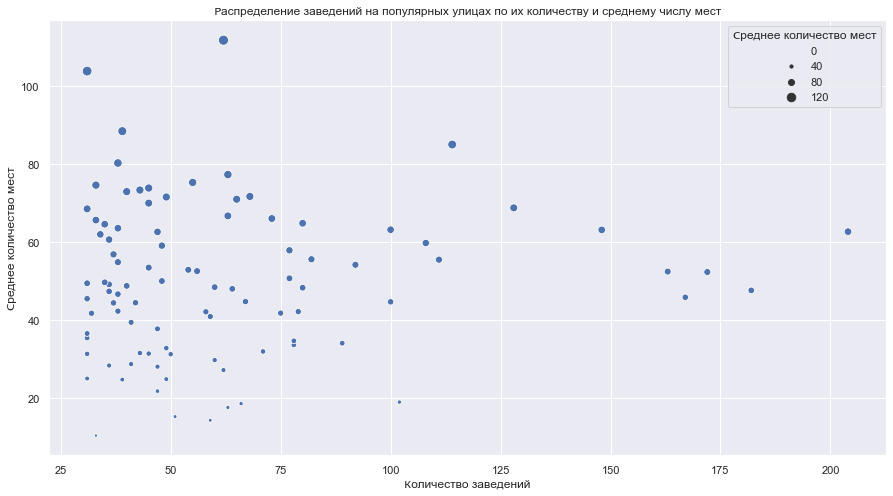

In [108]:
#Строим график
st_num = sea.scatterplot(data=street_number, x='Количество заведений', y='Среднее количество мест', \
                size='Среднее количество мест', sizes=(10, 100));

st_num.set_title("Распределение заведений на популярных улицах по их количеству и среднему числу мест")
legend_labels, _= st_num.get_legend_handles_labels()
st_num.legend(legend_labels, ['0','40','80','120'], 
          bbox_to_anchor=(1,1), 
         title='Среднее количество мест');

**Выводы**

Примерно половина заведений общепита, расположенных на самых популярных улицах, имеют среднюю вместимость около 48 мест, а подавляющее большинство заведений не выходят за пределы средней вместимости в 78 мест.
На улицах с меньшим количеством заведений вместимость больше. С увеличением количества заведений на улице, их средняя вместимость очень медленно падает, и колеблется от 50 до 60 мест.
Большинство заведений распределены по улицам, где их количество не превышает 75.

### Общие выводы

Больше всего в Москве не сетевых кафе, имеющих среднюю вместительность. Самыми насыщенными общепитом улицами являются  проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная. Если расматривать районы, то в лидерах Пресненский район, Чертаново Центральное и Тропарёво-Никулино.

Если отталкиваться от этой информации, то заведение необходимо разместить в Пресненском районе, оптимальная вместимость не должна превышать 50 мест.

Возможно вместо кафе стоит поменять тип заведения на предприятие быстрого питания. Конкуренция в этом сегменте должна быть ниже из-за значительно меньшего количества заведений по сравнению с кафе. Также возможно стоит рассмотреть не самые популярные улицы, а те, на которых ощущается нехватка заведений общепита. Однако здесь очевидно не хватает данных, надо рассмотреть также пешеходные потоки. Предпочтительно размещение в торгово-развлекательном центре или в соседстве с крупными офисными центрами либо высшими учебными заведениями. 

Презентация: https://disk.yandex.ru/i/jZ8mI2epJ_ceEw